In [106]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

128 128


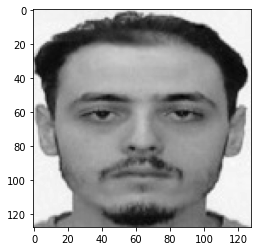

In [128]:
img_path = '1.jpg'
img = cv2.imread(img_path,0)
h,w = img.shape[:2]
print(w,h)
plt.imshow(img,cmap='gray')

128 128


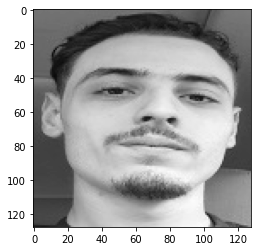

In [129]:
img_path = '2.jpg'
img2 = cv2.imread(img_path,0)
h2,w2 = img.shape[:2]
print(w2,h2)
plt.imshow(img2,cmap='gray')

128 128


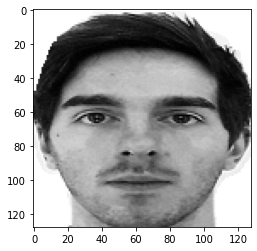

In [130]:
img_path = '3.png'
img3 = cv2.imread(img_path,0)
h3,w3 = img.shape[:2]
print(h3,w3)
plt.imshow(img3,cmap='gray')

In [110]:
img_res = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REFLECT)
height,width = img_res.shape[:2]
print(height,width)

img_res2 = cv2.copyMakeBorder(img2,1,1,1,1,cv2.BORDER_REFLECT)
height2,width2 = img_res2.shape[:2]
print(height2,width2)

img_res3 = cv2.copyMakeBorder(img3,1,1,1,1,cv2.BORDER_REFLECT)
height3,width3 = img_res3.shape[:2]
print(height3,width3)

130 130
130 130
130 130


In [111]:
def lbp(M,i_ref,j_ref):
    ref_value = M[i_ref][j_ref]
    bin_val = ""
    #0
    if M[i_ref-1][j_ref-1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #1
    if M[i_ref-1][j_ref] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #2
    if M[i_ref-1][j_ref+1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #3
    if M[i_ref][j_ref+1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #4
    if M[i_ref+1][j_ref+1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #5
    if M[i_ref+1][j_ref] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #6
    if M[i_ref+1][j_ref-1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #7 
    if M[i_ref][j_ref-1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    dec_val = int(bin_val,2) 
    #print(dec_val)
    return dec_val

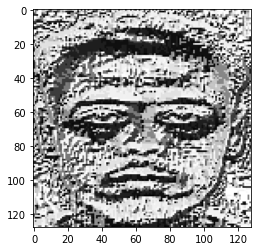

In [131]:
img_lbp = np.zeros((h,w))

for i in range(1,height-1):
    for j in range(1,width-1):
        img_lbp[i-1][j-1] = lbp(img_res,i,j)
cv2.imwrite('img_lbp.jpg', img_lbp)
plt.imshow(img_lbp,cmap='gray')

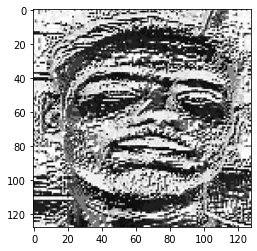

In [132]:
img_lbp2 = np.zeros((h2,w2))

for i in range(1,height2-1):
    for j in range(1,width2-1):
        img_lbp2[i-1][j-1] = lbp(img_res2,i,j)
cv2.imwrite('img_lbp2.jpg', img_lbp2)
plt.imshow(img_lbp2,cmap='gray')

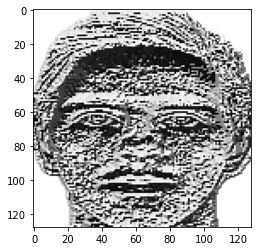

In [133]:
img_lbp3 = np.zeros((h3,w3))

for i in range(1,height3-1):
    for j in range(1,width3-1):
        img_lbp3[i-1][j-1] = lbp(img_res3,i,j)
cv2.imwrite('img_lbp3.jpg', img_lbp3)
plt.imshow(img_lbp3,cmap='gray')

In [135]:
def create_regions(test_image,bloc_size_r,bloc_size_c):
    regions = []
    for r in range(0,test_image.shape[0], bloc_size_r):
        for c in range(0,test_image.shape[1], bloc_size_c):
            window = test_image[r:r+bloc_size_r,c:c+bloc_size_c]
            regions.append(window)
    return np.array(regions)


In [136]:
# grey_levels = 256
# test_image = np.random.randint(0,grey_levels, size=(8,8))
# print(test_image)
bloc_size_r = 8
bloc_size_c = 8
regions = []
regions = create_regions(img_lbp,bloc_size_c,bloc_size_r)
print(regions)
regions2 = []
regions2 = create_regions(img_lbp2,bloc_size_c,bloc_size_r)
print(regions2)
regions3 = []
regions3 = create_regions(img_lbp3,bloc_size_c,bloc_size_r)
print(regions3)


[[[255. 120.  64. ... 197. 199. 255.]
  [255. 126. 224. ... 204. 207. 159.]
  [ 63. 127. 255. ...  92. 143. 191.]
  ...
  [255. 252. 223. ... 126. 231. 231.]
  [255. 126.  30. ... 127. 199. 207.]
  [ 63.  62.  18. ...  13. 207. 223.]]

 [[255. 126.  76. ... 255. 126. 126.]
  [ 30.  63.  80. ...  31.  55. 115.]
  [ 14. 255. 255. ...   4. 227. 243.]
  ...
  [251. 253. 224. ... 255. 255. 254.]
  [255. 254. 255. ... 159.  63. 127.]
  [ 30.  31.  31. ...  23.  27.  21.]]

 [[207. 207. 255. ... 207. 207. 255.]
  [209. 129. 155. ...  15.  15.   7.]
  [241. 225. 255. ...  13. 143. 135.]
  ...
  [223. 135. 255. ... 224. 225. 241.]
  [ 14. 207. 255. ... 239. 239. 255.]
  [  2.   9.   7. ... 141. 143. 191.]]

 ...

 [[246. 240. 240. ... 240. 240. 240.]
  [ 47. 255. 238. ... 240. 240. 248.]
  [ 15.  15.  15. ... 231. 251. 252.]
  ...
  [254. 158.   6. ... 135. 191.  60.]
  [ 30.  28.   2. ... 139. 191.  60.]
  [ 63.   4.  71. ... 223.  60.  60.]]

 [[240. 168. 253. ...  49.   0. 247.]
  [240. 240.

In [137]:
def get_desc(regions):
    descriptor = []
    hist = []
    for r in regions :
        temp = r.ravel().tolist()
        # print(temp)
        for i in range(256):
            hist.append(temp.count(i))
    descriptor.extend(hist)
    return descriptor

In [138]:
descriptor = get_desc(regions)
# print(descriptor)
descriptor2 = get_desc(regions2)
# print(descriptor2)
descriptor3 = get_desc(regions3)
# print(descriptor3)

In [139]:
from sklearn.metrics import mean_squared_error
mse_1 = mean_squared_error(descriptor,descriptor2)
mse_2 = mean_squared_error(descriptor,descriptor3)
print(mse_1)
print(mse_2)

1.692840576171875
2.507965087890625


In [97]:
# regions = []
# bloc_size = 8
# hits_num = 1
# for i in range(0,h-bloc_size,bloc_size):
#     for j in range(0,w-bloc_size,bloc_size):
#         regions.append(img_lbp[i:i+bloc_size,j:j+bloc_size])
# print(len(regions))
# for r in regions : 
#     plt.hist(r,256,[0,256])
#     plt.show()